## Q-Learning

Dans ce notebook, nous allons implémenter une seconde méthode qui apprend par expérimentation et utilise le *bootstrapping*.
Elle s'appelle Q-Learning.
    
Cette une méthode qui suit une stratégie *off-policy*, dans laquelle nous allons utilisé une politique exploratoire $b(s)$ pour parcourir l'environnement et une politique $\pi(s)$ à optimiser par apprentissage.

## Gérer les imports

In [ ]:
import gym
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython import display

from bucket_env import BucketEnv3
from bucket_env import plot_stats, testing, rendering
%matplotlib inline

## Initialiser l'environnement
Pour créer l'environnement, il faut simplement créer une instance de `BucketEnv3`

In [ ]:
env = BucketEnv3()

In [ ]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title("Etat initial")
plt.imshow(frame)

In [ ]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

## Definition de la table de valeurs $Q(s, a)$

#### Création de la table $Q(s, a)$
Cette table doit permettre de lier chaque état à une action.
Pour cela, on utilise la librairie `numpy` pour créer un tableau avec une forme (*shape*) correspondant à cette paire.
La forme attendu est donnée par un tuple.

Exemple
```python
>>> s = (2,2)
>>> np.zeros(s)
array([[ 0.,  0.],
       [ 0.,  0.]])
```


In [ ]:
action_values = np.zeros((7, 7, 7) + (5,))

## Définition des politiques

#### Création de la politique *cible* $\pi(s)$
Celle-ci se base uniquement sur la table de valeurs, elle fait **uniquement** de l'intensification. Il n'est donc pas nécessaire de disposer du paramètre $\epsilon$.

In [ ]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

#### Création de la politique *exploratoire* $b(s)$
A l'inverse, cette politique est purement aléatoire, elle fait **uniquement** de l'exploration. Là encore, il n'est pas nécessaire de disposer du paramètre $\epsilon$.

In [ ]:
def exploratory_policy(state):
    return np.random.randint(5)

## Implementation de l'algorithme

</br>

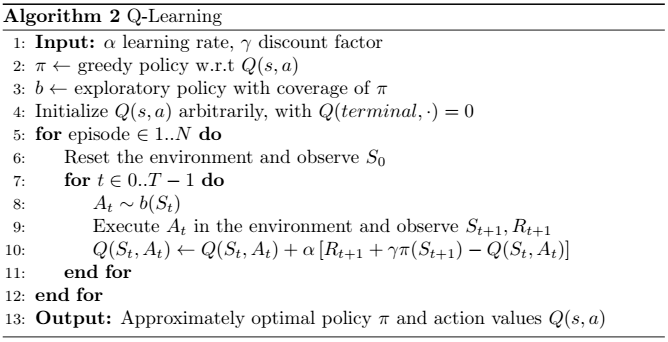
</br>
<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>



In [ ]:
def q_learning(exploratory_policy, target_policy, action_values, episodes, alpha=0.1, gamma=0.99):
    stats = {'Returns': []}
    for episode in tqdm(range(1, episodes + 1)):
        state = env.reset()
        done = False
        ep_return = 0
        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            ep_return += reward
            next_action = target_policy(next_state) if not done else None
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action] if not done else 0.
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
    
            state = next_state
        stats['Returns'].append(ep_return)
    return stats

In [ ]:
stats = q_learning(exploratory_policy, target_policy, action_values, episodes=10000)

In [ ]:
plot_stats(stats)

In [ ]:
testing(env, action_values)

In [ ]:
rendering(env, target_policy)